# **TEXT MINING**

In [236]:
import numpy as np 
import pandas as pd 

## Preprocessing 1:

- Lower case
- Contraction
- Remove number (or Replace)
- Remove puctuation
- Remove stopwords
- Remove white space

In [237]:
df_sms = pd.read_csv('sms_spam_collection.csv')
df_sms

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### 1. Convert to Lower Case

In [238]:
def to_lower(text):
    return text.lower()

In [239]:
contoh_text = "Manchester City vs Liverpool FA Cup"
to_lower(contoh_text)

'manchester city vs liverpool fa cup'

### 2. Contraction

In [240]:
import re

In [241]:
contractions_dict = {     
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}


def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)
                                    # re.IGNORECASE: case insensitive
                                    # re.DOTALL: titik dianggap titik, bukan sebagai wildcard

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text) # dari singkatan, menjadi dijabarkan
    expanded_text = re.sub("'", "", expanded_text) # menghilangkan petik satu
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [242]:
contoh_text = "You're not the only one"
main_contraction(contoh_text)

'you are not the only one'

### 3. Remove Number (or Replace)

In [243]:
def remove_number(text):
    output = ''.join([char for char in text if not char.isdigit()])
    return output

In [244]:
contoh_text = "Next year is 2023"
remove_number(contoh_text)

'Next year is '

### 4. Remove Punctuation

In [245]:
from string import  punctuation

In [246]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [247]:
def remove_punctuation(text):
    output = "".join([char for char in text if char not in punctuation])
    return output

In [248]:
contoh_text = "Why always me?"

remove_punctuation(contoh_text)

'Why always me'

### 5. Remove Stopwords

In [249]:
import nltk
from nltk.corpus import stopwords

In [250]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [251]:
stop_words = stopwords.words('english')
# stop_words

In [252]:
text = "I am stay here for 10 minutes"

nltk.word_tokenize(text)

['I', 'am', 'stay', 'here', 'for', '10', 'minutes']

In [253]:
text = "I am stay here for 10 minutes"

" ".join([word for word in nltk.word_tokenize(text) if not word in stop_words])

'I stay 10 minutes'

In [254]:
def remove_stopwords(text):
    output = " ".join([word for word in nltk.word_tokenize(text) if not word in stop_words])
    return output

In [255]:
text = "I am stay here for 10 minutes"

remove_stopwords(text)

'I stay 10 minutes'

### 6. Remove Whitespace

In [256]:
text = "I am   stay here for 10 minutes "

" ".join(text.split())

'I am stay here for 10 minutes'

In [257]:
def to_strip(text):
    output = " ".join(text.split())
    return output

In [258]:
text = "I am   stay here for 10 minutes     "

to_strip(text)

'I am stay here for 10 minutes'

### Combine All Steps

In [259]:
contoh_text = "I'm still here in November 2020, enjoying my happy life."

text1 = main_contraction(contoh_text)
text1

text1 = to_lower(text1)
text1

text1 = remove_number(text1)
text1

text1 = remove_punctuation(text1)
text1

text1 = remove_stopwords(text1)
text1

text1 = to_strip(text1)
text1

'still november enjoying happy life'

In [260]:
df_sms['prep1'] = df_sms['message'].apply(to_lower)
df_sms['prep2'] = df_sms['prep1'].apply(main_contraction)
df_sms['prep3'] = df_sms['prep2'].apply(main_contraction)
df_sms['prep4'] = df_sms['prep3'].apply(remove_punctuation)
df_sms['prep5'] = df_sms['prep4'].apply(remove_stopwords)
df_sms['prep6'] = df_sms['prep5'].apply(to_strip)

df_sms

,label,message,prep1,prep2,prep3,prep4,prep5,prep6
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say early hor u c already say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah think goes usf lives around though,nah think goes usf lives around though
...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u £750 pound prize ...,2nd time tried 2 contact u u £750 pound prize ...
5568,ham,Will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home,ü b going esplanade fr home,ü b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...","pity, * was in mood for that. so...any other s...","pity, * was in mood for that. so...any other s...","pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...,pity mood soany suggestions,pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like be...,the guy did some bitching but i acted like be...,the guy did some bitching but i acted like be...,guy bitching acted like interested buying some...,guy bitching acted like interested buying some...


## Preprocessing 2:

- Stemming
- Lemmatization

In [261]:
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

### Stemming

In [262]:
snowball_stemmer = SnowballStemmer('english')

words = "cares"

snowball_stemmer.stem(word)

NameError: name 'word' is not defined

In [ ]:
snowball_stemmer = SnowballStemmer('english')

def stem(text):
    stemmed_word = " ".join([snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)])
    return stemmed_word

In [ ]:
text = "i am reading the book and it is very fascinating"

stem(text)

'i am read the book and it is veri fascin'

In [ ]:
text = "cares cared care carefull carefully caring"

stem(text)

'care care care careful care care'

### Lemmatization

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    lemmatized_word = " ".join([wordnet_lemmatizer.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)])
    return lemmatized_word

In [ ]:
text = "i am reading the book and it is very fascinating"

lemmatize(text)

'i am reading the book and it is very fascinating'

In [ ]:
text = "cares cared care carefull carefully caring"

lemmatize(text)

'care cared care carefull carefully caring'

### Combine All Steps

In [ ]:
df_sms['stem'] = df_sms['prep6'].apply(stem)
df_sms.head()

,label,message,prep1,prep2,prep3,prep4,prep5,prep6,stem,lemmatize
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final...,free entry in a wkly comp to win fa cup final...,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say early hor u c already say,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah think goes usf lives around though,nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though


In [ ]:
df_sms['lemmatize'] = df_sms['prep6'].apply(lemmatize)
df_sms.head()

,label,message,prep1,prep2,prep3,prep4,prep5,prep6,stem,lemmatize
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final...,free entry in a wkly comp to win fa cup final...,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say early hor u c already say,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah think goes usf lives around though,nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though


## Bag of Words (Document Term Matrix)

### 1. Term Frequency (TF)

- Berapa kali suatu kata muncul dalam suatu document

In [ ]:
from sklearn.feature_extraction.text import  CountVectorizer

In [ ]:
word_example = [
    "fun learning fun",
    "can do all day",
    "hate feel"
]

In [ ]:
# define vectorizer
vect = CountVectorizer()

# fit to corpus 
vect.fit(word_example)

CountVectorizer()

In [ ]:
len(vect.vocabulary_)

8

In [ ]:
vect.vocabulary_

{'fun': 5,
 'learning': 7,
 'can': 1,
 'do': 3,
 'all': 0,
 'day': 2,
 'hate': 6,
 'feel': 4}

In [ ]:
# transform to bag of words
dtm = vect.transform(word_example)
dtm

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
dtm.toarray()

array([[0, 0, 0, 0, 0, 2, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0]], dtype=int64)

In [ ]:
vect.get_feature_names_out()

array(['all', 'can', 'day', 'do', 'feel', 'fun', 'hate', 'learning'],
      dtype=object)

In [ ]:
dtm_df = pd.DataFrame(
    dtm.toarray(),
    columns=vect.get_feature_names_out()
)

dtm_df

,all,can,day,do,feel,fun,hate,learning
0,0,0,0,0,0,2,0,1
1,1,1,1,1,0,0,0,0
2,0,0,0,0,1,0,1,0


**n-Grams**

In [ ]:
# ?CountVectorizer

In [ ]:
word_example = [
    "fun learning fun",     # 2
    "can do all day",       # 3
    "hate feel"             # 1
]

In [ ]:
# define vectorizer
vect = CountVectorizer(ngram_range=(2,2))

# fit to corpus 
vect.fit(word_example)

CountVectorizer(ngram_range=(2, 2))

In [ ]:
dtm_2gram = vect.transform(word_example)
dtm_2gram.toarray()

array([[0, 0, 0, 1, 0, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]], dtype=int64)

In [ ]:
dtm_2gram_df = pd.DataFrame(
    dtm_2gram.toarray(),
    columns=vect.get_feature_names_out()
)

dtm_2gram_df

,all day,can do,do all,fun learning,hate feel,learning fun
0,0,0,0,1,0,1
1,1,1,1,0,0,0
2,0,0,0,0,1,0


### Term Frequency - Inverse Document Frequncy (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
word_example = [
    "fun learning fun",     
    "can do all day",     
    "hate feel"           
]

In [ ]:
# ?TfidfVectorizer

In [ ]:
# define vectorizer
tfidf_vect = TfidfVectorizer(norm=None)

# fitting
tfidf_vect.fit(word_example)

TfidfVectorizer(norm=None)

In [ ]:
# tfidf_vect.vocabulary_

In [ ]:
# transform
dtm_tfidf = tfidf_vect.transform(word_example)
dtm_tfidf.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        3.38629436, 0.        , 1.69314718],
       [1.69314718, 1.69314718, 1.69314718, 1.69314718, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.69314718,
        0.        , 1.69314718, 0.        ]])

In [ ]:
dtm_tfidf_df = pd.DataFrame(
    dtm_tfidf.toarray(),
    columns=tfidf_vect.get_feature_names_out()
)

dtm_tfidf_df

,all,can,day,do,feel,fun,hate,learning
0,0.000000,0.000000,0.000000,0.000000,0.000000,3.386294,0.000000,1.693147
1,1.693147,1.693147,1.693147,1.693147,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,1.693147,0.000000,1.693147,0.000000


In [ ]:
dtm_df['label'] = df_sms['label']
dtm_df

,all,can,day,do,feel,fun,hate,learning,label
0,0,0,0,0,0,2,0,1,ham
1,1,1,1,1,0,0,0,0,ham
2,0,0,0,0,1,0,1,0,spam


## Text Exploration

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Word Frequency

In [ ]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)') # ambil tiap kata
    check.columns = ['check']                   # ganti nama kolom
    b = check.reset_index(drop=True)            # reset index
    check = b['check'].value_counts()           # hitung frekuensi tiap kata

    # buat dataframe untuk barchart
    kamus = {'kata':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)
    
    return kamus

In [ ]:
kamus(df_sms['lemmatize'])

,freq
kata,
u,1226
call,605
get,401
ur,390
go,311
...,...
temales,1
oja,1
tke,1


<AxesSubplot:ylabel='kata'>

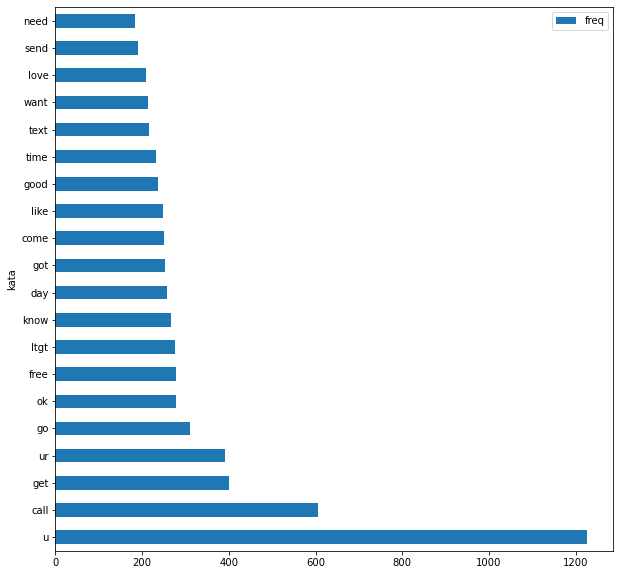

In [ ]:
kamus(df_sms['lemmatize'])[:20].plot(kind='barh', figsize=(10,10))

- 'u' adalah kaya yang paling sering muncul dalam seluruh corpus
- Jika 'u' dianggap sebagai stopwords, maka 'u' bisa dibuang dari analisis

### Length of Sentence

In [ ]:
df_sms['length'] = df_sms['lemmatize'].apply(len)
df_sms.head()

,label,message,prep1,prep2,prep3,prep4,prep5,prep6,stem,lemmatize,length
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...,82
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni,23
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final...,free entry in a wkly comp to win fa cup final...,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...,106
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say early hor u c already say,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say,35
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah think goes usf lives around though,nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though,35


In [ ]:
sms_spam = df_sms[df_sms['label']=='spam']
sms_ham = df_sms[df_sms['label']=='ham']

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


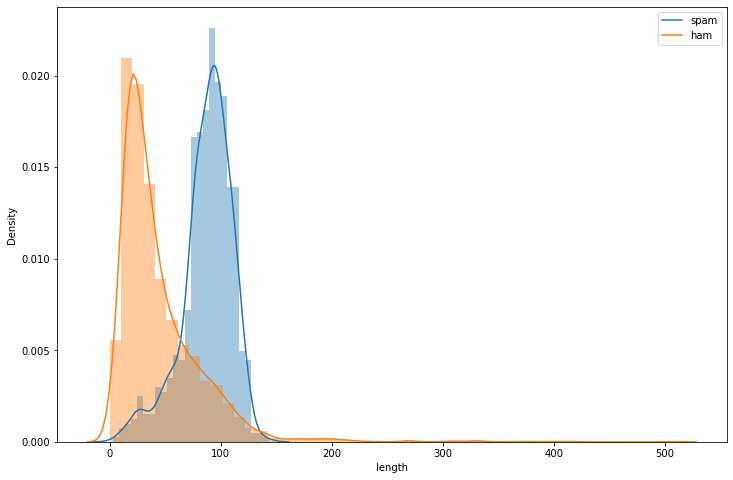

In [ ]:
plt.figure(figsize=(12,8))

sns.distplot(sms_spam['length'])
sns.distplot(sms_ham['length'])

plt.legend(['spam','ham'])
plt.show()

Ada kecenderungan sms spam lebi panjang